# [4] Analyzing Take Rate

In [1]:
cd ..

/home/jovyan/Business_Analytics/Business-Insights-and-Analytics/Marketing_Analytics


In [2]:
%run __init__.py
%matplotlib inline

## 1. In each month, what were the gross billings and net revenue?
a) Run SQL query to pull the booking information from the `services_service` table and the owner fee information from the `people_person` table

b) Calculate `gross_billings` and `net_revenue` using `owner_fee`, `service_fee` and `price_per_unit`

c) Group table by Month and Order by month, year to show the gross billings and the net revenue in each month

In [3]:
query_billings = ('SELECT p.fee AS owner_fee, s.added AS date_service_active, s.fee AS service_fee, s.price AS price_per_unit \
                   FROM services_service s \
                   JOIN people_person p \
                   ON (s.provider_id = p.id);')

conn = sqlite3.connect('db26.sqlite3')

In [4]:
billings_df = pd.read_sql_query(query_billings, conn)
billings_df.sample(2)

,owner_fee,date_service_active,service_fee,price_per_unit
2940,0.07,2017-05-24 06:37:14.797806,0.2,30
4706,0.07,2017-03-27 08:30:46.762638,0.2,39


In [5]:
# convert each column to datetime format
billings_df['date_service_active']  = pd.to_datetime(billings_df['date_service_active'])

# splitting each column into a date column
billings_df['year_service_active']  = billings_df["date_service_active"].dt.year
billings_df['month_service_active'] = billings_df["date_service_active"].dt.month
billings_df['date_service_active']  = billings_df['date_service_active'].dt.date

In [6]:
billings_df.sample(2)

,owner_fee,date_service_active,service_fee,price_per_unit,year_service_active,month_service_active
17964,0.05,2016-04-07,0.15,29,2016,4
21508,0.07,2017-04-13,0.20,27,2017,4


In [7]:
billings_df['gross_billings'] = billings_df.price_per_unit + (billings_df.price_per_unit * billings_df.owner_fee)

billings_df['net_revenue']    = (billings_df.price_per_unit * billings_df.owner_fee) + (billings_df.price_per_unit * billings_df.service_fee)

In [8]:
billings_df.sample(2)

,owner_fee,date_service_active,service_fee,price_per_unit,year_service_active,month_service_active,gross_billings,net_revenue
20005,0.05,2016-10-20,0.2,31,2016,10,32.55,7.75
10502,0.05,2016-09-06,0.2,23,2016,9,24.15,5.75


In [9]:
# using .sum() will add all the price per units in each month to calculate gross billings and net revenue
money_by_month = billings_df.groupby(['date_service_active'], as_index=False).sum()

In [10]:
money_by_month.sort_values(['year_service_active', 'month_service_active']).head(2)

,date_service_active,owner_fee,service_fee,price_per_unit,year_service_active,month_service_active,gross_billings,net_revenue
3,2015-07-24,0.02,0.15,30,2015,7,30.6,5.1
5,2015-07-28,0.02,0.15,30,2015,7,30.6,5.1


In [11]:
money_by_month = billings_df.groupby(['month_service_active', 'year_service_active'], as_index=False).sum()

In [12]:
money_by_month = money_by_month.sort_values(['year_service_active', 'month_service_active'])
money_by_month.head(2)

,month_service_active,year_service_active,owner_fee,service_fee,price_per_unit,gross_billings,net_revenue
12,7,2015,0.32,27.90,5169,5178.18,784.53
15,8,2015,2.10,15.75,2894,2951.88,491.98


## 2. Define take rate to be the percentage of gross billings that is net revenue. In each month, what was the aggregate take rate?

a) Calculate take rate by dividing `net_revenue` by `gross_billings`, multiply by 100

b) Add labels for Months using the calendar library

c) Split tables into 3 separate tables, one for each year where there are records: 2015, 2016, and 2017 for analysis

In [13]:
money_by_month['take_rate'] = (money_by_month.net_revenue / money_by_month.gross_billings) * 100
money_by_month.head(2)

,month_service_active,year_service_active,owner_fee,service_fee,price_per_unit,gross_billings,net_revenue,take_rate
12,7,2015,0.32,27.90,5169,5178.18,784.53,15.150690
15,8,2015,2.10,15.75,2894,2951.88,491.98,16.666667


In [14]:
moneys = money_by_month.drop(['owner_fee', 'service_fee', 'price_per_unit'], axis=1)
moneys.head(2)

,month_service_active,year_service_active,gross_billings,net_revenue,take_rate
12,7,2015,5178.18,784.53,15.150690
15,8,2015,2951.88,491.98,16.666667


In [15]:
moneys['month_service_active'] = moneys['month_service_active'].apply(lambda x: calendar.month_abbr[x])

In [16]:
moneys.head(2)

,month_service_active,year_service_active,gross_billings,net_revenue,take_rate
12,Jul,2015,5178.18,784.53,15.150690
15,Aug,2015,2951.88,491.98,16.666667


In [17]:
moneys_2015 = moneys[moneys.year_service_active == 2015]
moneys_2015.drop('year_service_active', axis=1, inplace=True)
moneys_2015

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,month_service_active,gross_billings,net_revenue,take_rate
12,Jul,5178.18,784.53,15.150690
15,Aug,2951.88,491.98,16.666667
17,Sep,4371.72,728.62,16.666667
19,Oct,6587.16,1097.86,16.666667
21,Nov,8841.36,1473.56,16.666667
23,Dec,12096.21,2270.21,18.767945


In [18]:
moneys_2015.rename(columns={
    'month_service_active': 'Month Service Active',
    'gross_billings': 'Gross Billings',
    'net_revenue': 'Net Revenue',
    'take_rate': 'Take Rate (%)'
}, inplace=True)
moneys_2015

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Month Service Active,Gross Billings,Net Revenue,Take Rate (%)
12,Jul,5178.18,784.53,15.150690
15,Aug,2951.88,491.98,16.666667
17,Sep,4371.72,728.62,16.666667
19,Oct,6587.16,1097.86,16.666667
21,Nov,8841.36,1473.56,16.666667
23,Dec,12096.21,2270.21,18.767945


In [19]:
moneys_2016 = moneys[moneys.year_service_active == 2016]
moneys_2016.drop('year_service_active', axis=1, inplace=True)
moneys_2016

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,month_service_active,gross_billings,net_revenue,take_rate
0,Jan,14412.30,2745.20,19.047619
2,Feb,16109.10,3068.40,19.047619
4,Mar,20085.45,3825.80,19.047619
6,Apr,20413.05,3973.25,19.464264
8,May,23251.20,5536.00,23.809524
10,Jun,25019.40,5957.00,23.809524
13,Jul,26260.50,6252.50,23.809524
16,Aug,28064.40,6682.00,23.809524
18,Sep,34102.95,8119.75,23.809524
20,Oct,31594.50,7522.50,23.809524


In [20]:
moneys_2016.rename(columns={
    'month_service_active': 'Month Service Active',
    'gross_billings': 'Gross Billings',
    'net_revenue': 'Net Revenue',
    'take_rate': 'Take Rate (%)'
}, inplace=True)
moneys_2016

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Month Service Active,Gross Billings,Net Revenue,Take Rate (%)
0,Jan,14412.30,2745.20,19.047619
2,Feb,16109.10,3068.40,19.047619
4,Mar,20085.45,3825.80,19.047619
6,Apr,20413.05,3973.25,19.464264
8,May,23251.20,5536.00,23.809524
10,Jun,25019.40,5957.00,23.809524
13,Jul,26260.50,6252.50,23.809524
16,Aug,28064.40,6682.00,23.809524
18,Sep,34102.95,8119.75,23.809524
20,Oct,31594.50,7522.50,23.809524


In [21]:
moneys_2017 = moneys[moneys.year_service_active == 2017]
moneys_2017.drop('year_service_active', axis=1, inplace=True)
moneys_2017

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,month_service_active,gross_billings,net_revenue,take_rate
1,Jan,40706.01,10271.61,25.233645
3,Feb,35779.73,9028.53,25.233645
5,Mar,45013.83,11358.63,25.233645
7,Apr,47734.84,12045.24,25.233645
9,May,50989.78,12866.58,25.233645
11,Jun,47829.00,12069.00,25.233645
14,Jul,17042.96,4300.56,25.233645


In [22]:
moneys_2017.rename(columns={
    'month_service_active': 'Month Service Active',
    'gross_billings': 'Gross Billings',
    'net_revenue': 'Net Revenue',
    'take_rate': 'Take Rate (%)'
}, inplace=True)
moneys_2017

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Month Service Active,Gross Billings,Net Revenue,Take Rate (%)
1,Jan,40706.01,10271.61,25.233645
3,Feb,35779.73,9028.53,25.233645
5,Mar,45013.83,11358.63,25.233645
7,Apr,47734.84,12045.24,25.233645
9,May,50989.78,12866.58,25.233645
11,Jun,47829.00,12069.00,25.233645
14,Jul,17042.96,4300.56,25.233645


## 3. Did take rate trend up or trend down or remain unchanged over time?

a) Plot the change in take rate over time on one plot

b) Pivot the data and plot so that there is a different line for each year 

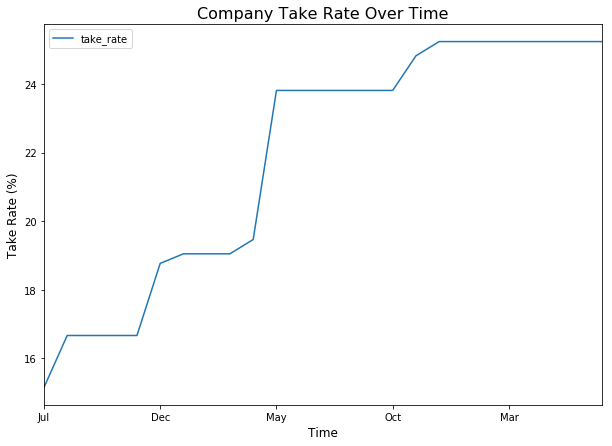

In [23]:
moneys.plot(x='month_service_active', y='take_rate', figsize=(10,7))
plt.xlabel('Time', fontsize=12)
plt.ylabel('Take Rate (%)', fontsize=12)
plt.title('Company Take Rate Over Time', fontsize=16)

## Analysis: 
- 15% to 25% increase in take rate over time

- Rate of Increase is not constant. 


In [24]:
pivot_money = money_by_month.pivot(index='month_service_active', columns='year_service_active', values='take_rate')

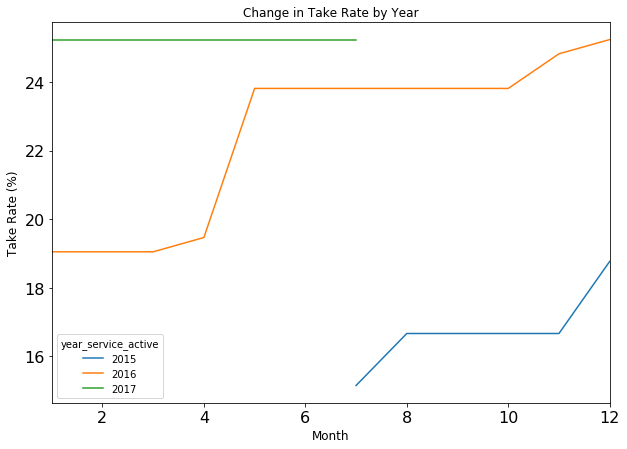

In [25]:
pivot_money.plot(figsize=(10,7), title='Change in Take Rate by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Take Rate (%)', fontsize=12)

## Analysis:

- This chart shows the change in take rate by each year and highlights areas where further analysis would be helpful, including: 

- Between April and May, 2016 where there is the largest increase in take rate

- 2017, where there is no change in take rate

- Does the number of users, number of bookings, cost per booking, change in owner fees, or change in service fees affect the change in take rate? 

## 4. If it did change, investigate why and provide an explanation. Be sure to provide additional data/charts/evidence that justify your explanation. Any claims should be backed by data.

#### To investigate
- I would look into the increase in take rate that occurred between April and May, 2016. 


- I would also look at the number of users, number of bookings, cost per booking, change in owner fees, and change in service fees.  


- Is the change in take rate due, in particular, to any of these factors changing?
